<a href="https://colab.research.google.com/github/nhs000/machine_learning_practice_prj/blob/master/ban_giong_cau_thu_nao_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google_images_download

     |████████████████████████████████| 911kB 1.4MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=b3cc4eeec73f8f18a7c718a7322e9b7dcca3cf77c6e8081c72a142f191265de3
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [2]:
!pip install icrawler

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
bs = 64

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from icrawler.builtin import GoogleImageCrawler
from IPython.display import Image


In [0]:
def create_data(dataType, className, keyword, startIdx=0, maxNum=100):
  google_crawler = GoogleImageCrawler(storage={'root_dir': '~/data/'+dataType+'/'+className})
  google_crawler.crawl(keyword=keyword, max_num=maxNum, file_idx_offset=startIdx)
  

In [7]:
create_data('train', 'messi', 'messi face portrait', 0, 100)

2019-08-19 16:19:52,441 - INFO - icrawler.crawler - start crawling...
2019-08-19 16:19:52,442 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-08-19 16:19:52,450 - INFO - feeder - thread feeder-001 exit
2019-08-19 16:19:52,451 - INFO - icrawler.crawler - starting 1 parser threads...
2019-08-19 16:19:52,460 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-08-19 16:19:53,131 - INFO - parser - parsing result page https://www.google.com/search?q=messi+face+portrait&ijn=0&start=0&tbs=&tbm=isch
2019-08-19 16:19:53,504 - INFO - downloader - image #1	https://i.pinimg.com/originals/7d/5c/83/7d5c834bc2ffbe69d99149d3a79eedd4.jpg
2019-08-19 16:19:54,169 - INFO - downloader - image #2	https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/affe7079-7209-42a0-b6e9-a3bcdc99d98e/d4w7m2e-91965392-d4c6-46eb-a24c-95820245d6af.jpg?token=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJzdWIiOiJ1cm46YXBwOjdlMGQxODg5ODIyNjQzNzNhNWYwZDQxNWVhMGQyNmUwIiwiaXNzIjoidXJuOmFwcDo3ZTBkMTg4OTgyMj

In [8]:
fnames = get_image_files("~/data/train/messi")
len(fnames)

82

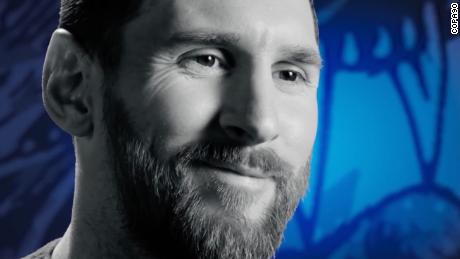

In [9]:
Image(filename=fnames[0].as_posix()) 

In [10]:
create_data('valid', 'messi', 'messi face portrait', 100, 50)

2019-08-19 16:20:55,664 - INFO - icrawler.crawler - start crawling...
2019-08-19 16:20:55,666 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-08-19 16:20:55,672 - INFO - feeder - thread feeder-001 exit
2019-08-19 16:20:55,673 - INFO - icrawler.crawler - starting 1 parser threads...
2019-08-19 16:20:55,676 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-08-19 16:20:56,066 - INFO - parser - parsing result page https://www.google.com/search?q=messi+face+portrait&ijn=0&start=0&tbs=&tbm=isch
2019-08-19 16:20:57,295 - INFO - downloader - image #1	https://i.pinimg.com/originals/7d/5c/83/7d5c834bc2ffbe69d99149d3a79eedd4.jpg
2019-08-19 16:20:57,321 - INFO - downloader - image #2	https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/affe7079-7209-42a0-b6e9-a3bcdc99d98e/d4w7m2e-91965392-d4c6-46eb-a24c-95820245d6af.jpg?token=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJzdWIiOiJ1cm46YXBwOjdlMGQxODg5ODIyNjQzNzNhNWYwZDQxNWVhMGQyNmUwIiwiaXNzIjoidXJuOmFwcDo3ZTBkMTg4OTgyMj

In [11]:
fnames = get_image_files("~/data/valid/messi")
len(fnames)


50

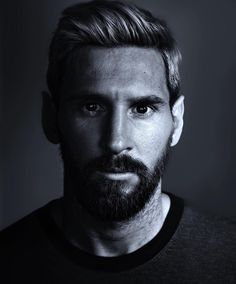

In [12]:
Image(filename=fnames[0].as_posix()) 

In [13]:
create_data('test', 'messi', 'messi face portrait', 150, 50)

2019-08-19 16:21:12,830 - INFO - icrawler.crawler - start crawling...
2019-08-19 16:21:12,834 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-08-19 16:21:12,839 - INFO - feeder - thread feeder-001 exit
2019-08-19 16:21:12,840 - INFO - icrawler.crawler - starting 1 parser threads...
2019-08-19 16:21:12,847 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-08-19 16:21:13,249 - INFO - parser - parsing result page https://www.google.com/search?q=messi+face+portrait&ijn=0&start=0&tbs=&tbm=isch
2019-08-19 16:21:13,383 - INFO - downloader - image #1	https://i.pinimg.com/originals/7d/5c/83/7d5c834bc2ffbe69d99149d3a79eedd4.jpg
2019-08-19 16:21:13,390 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-08-19 16:21:13,391 - INFO - parser - thread parser-001 exit
2019-08-19 16:21:13,714 - INFO - downloader - image #2	https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/affe7079-7209-42a0-b6e9-a3bcdc99d98e/d4w7m2e-91965392-d

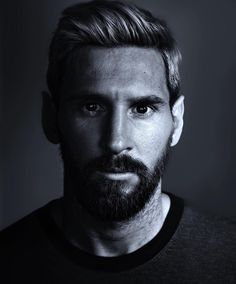

In [14]:
Image(filename=fnames[0].as_posix())

In [0]:

# preview image



In [15]:
# load data
data = ImageDataBunch.from_folder("~/data/", size=256)
data = data.normalize(imagenet_stats)

2019-08-19 16:21:27,583 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-08-19 16:21:27,585 - INFO - parser - thread parser-001 exit


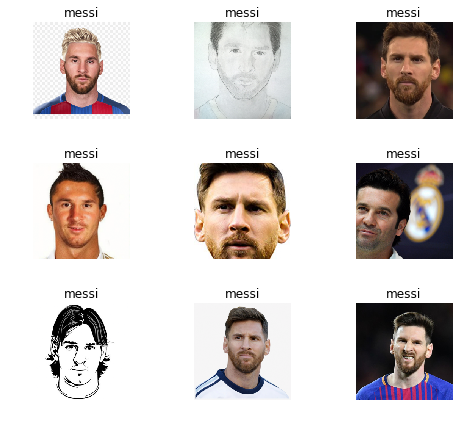

In [16]:
data.show_batch(rows=3, figsize=(7,6))


In [17]:
create_data('train', 'ronaldo', 'c.ronaldo face portrait', 0, 100)


2019-08-19 16:21:40,860 - INFO - icrawler.crawler - start crawling...
2019-08-19 16:21:40,863 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-08-19 16:21:40,865 - INFO - feeder - thread feeder-001 exit
2019-08-19 16:21:40,865 - INFO - icrawler.crawler - starting 1 parser threads...
2019-08-19 16:21:40,875 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-08-19 16:21:41,480 - INFO - parser - parsing result page https://www.google.com/search?q=c.ronaldo+face+portrait&ijn=0&start=0&tbs=&tbm=isch
2019-08-19 16:21:41,775 - INFO - downloader - image #1	https://cdn.shopify.com/s/files/1/0747/3829/products/mHP1969_1024x1024.jpg?v=1511950578
2019-08-19 16:21:41,969 - INFO - downloader - image #2	https://i.pinimg.com/474x/8a/f7/84/8af7846050dd2c6b7693cce05d6ca2cd.jpg
2019-08-19 16:21:42,110 - INFO - downloader - image #3	https://images.performgroup.com/di/library/GOAL/b/aa/cristiano-ronaldo-juventus_j4n1kpwsoqj21bammxm13odyb.jpg?t=123025297&quality=100
2019-08-19 16

In [18]:
create_data('valid', 'ronaldo', 'c.ronaldo face portrait', 100, 50)


2019-08-19 16:22:13,966 - INFO - icrawler.crawler - start crawling...
2019-08-19 16:22:13,967 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-08-19 16:22:13,969 - INFO - feeder - thread feeder-001 exit
2019-08-19 16:22:13,969 - INFO - icrawler.crawler - starting 1 parser threads...
2019-08-19 16:22:13,978 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-08-19 16:22:14,398 - INFO - parser - parsing result page https://www.google.com/search?q=c.ronaldo+face+portrait&ijn=0&start=0&tbs=&tbm=isch
2019-08-19 16:22:14,531 - INFO - downloader - image #1	https://cdn.shopify.com/s/files/1/0747/3829/products/mHP1969_1024x1024.jpg?v=1511950578
2019-08-19 16:22:14,585 - INFO - downloader - image #2	https://i.pinimg.com/474x/8a/f7/84/8af7846050dd2c6b7693cce05d6ca2cd.jpg
2019-08-19 16:22:14,667 - INFO - downloader - image #3	https://images.performgroup.com/di/library/GOAL/b/aa/cristiano-ronaldo-juventus_j4n1kpwsoqj21bammxm13odyb.jpg?t=123025297&quality=100
2019-08-19 16

In [0]:
create_data('test', 'ronaldo', 'c.ronaldo face portrait', 150, 200)

2019-08-19 16:22:21,025 - INFO - icrawler.crawler - start crawling...
2019-08-19 16:22:21,026 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-08-19 16:22:21,029 - INFO - feeder - thread feeder-001 exit
2019-08-19 16:22:21,029 - INFO - icrawler.crawler - starting 1 parser threads...
2019-08-19 16:22:21,038 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-08-19 16:22:21,177 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2019-08-19 16:22:21,178 - INFO - parser - thread parser-001 exit
2019-08-19 16:22:21,449 - INFO - parser - parsing result page https://www.google.com/search?q=c.ronaldo+face+portrait&ijn=0&start=0&tbs=&tbm=isch
2019-08-19 16:22:21,556 - INFO - downloader - image #1	https://cdn.shopify.com/s/files/1/0747/3829/products/mHP1969_1024x1024.jpg?v=1511950578
2019-08-19 16:22:21,617 - INFO - downloader - image #2	https://i.pinimg.com/474x/8a/f7/84/8af7846050dd2c6b7693cce05d6ca2cd.jpg
2019-08-19 16:22:21,775 - 

In [0]:
# load data
data = ImageDataBunch.from_folder("~/data/", size=256)
data = data.normalize(imagenet_stats)

In [0]:
data.show_batch(rows=3, figsize=(7,6))


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [0]:
learn.model


In [0]:
learn.fit_one_cycle(4)


In [0]:
learn.save('stage-1')


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [0]:
interp.plot_top_losses(9, figsize=(15,11))


In [0]:
learn.unfreeze()


In [0]:
learn.fit_one_cycle(1)


In [0]:
learn.lr_find()


In [0]:
learn.recorder.plot()


In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-3,1e-3))

In [0]:
learn.show_results()


In [0]:
interp.most_confused(min_val=2)


In [0]:
learn

In [0]:
google_crawler = GoogleImageCrawler(storage={'root_dir': '~/test/'})
google_crawler.crawl(keyword='ronaldinho', max_num=1, file_idx_offset=0)

In [0]:
fnames = get_image_files("~/test/")
Image(filename=fnames[0].as_posix())

In [0]:
learn.predict(open_image(fnames[0]))

In [0]:
google_crawler = GoogleImageCrawler(storage={'root_dir': '~/test/quanghai'})
google_crawler.crawl(keyword='nguyen quang hai', max_num=1, file_idx_offset=0)

In [0]:
fnames = get_image_files("~/test/quanghai")
len(fnames)

In [0]:
Image(filename=fnames[0].as_posix())

In [0]:
learn.predict(open_image(fnames[0]))